# Collaborative filtering 

In this notebook we will present a simple example using **Collaborative filtering** for movie **recommendation**.

Collab models uses a `DataFrame` of user, items and rating

In [3]:
from fastai import *
from fastai.collab import *

In [1]:
user, item , title = 'userId', 'movieId', 'title'

## Movie Lenser sample

In [7]:
path = untar_data(URLs.ML_SAMPLE)
path.ls()

[PosixPath('/home/anass/.fastai/data/movie_lens_sample/ratings.csv')]

In [10]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


## CollabData Bunch

In [12]:
data = CollabDataBunch.from_df(ratings,seed=42)

In [13]:
y_range = [0,5.5]     #range of the rating

## Collaboration learner

In [17]:
learner = collab_learner(data, n_factors= 50, y_range=y_range)

In [18]:
learner.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.609956,0.912380,00:01
1,0.861154,0.684030,00:00
2,0.667524,0.674964,00:00


## Movielens 100k

Let's now try with full movielens $\mathbf{100}$k datasets. The data is available from [http://files.grouplens.org/datasets/movielens/ml-100k.zip](http://files.grouplens.org/datasets/movielens/ml-100k.zip)

First we donwload the data in the default library path

```shell
cd .fastai/data
wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
unzi ml-100k.zip
```

In [26]:
path = Config.data_path()/'ml-100k'  #path for the data
path.ls()

[PosixPath('/home/anass/.fastai/data/ml-100k/allbut.pl'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u2.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u3.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/ub.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u4.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u2.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.info'),
 PosixPath('/home/anass/.fastai/data/ml-100k/mku.sh'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u3.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u1.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u4.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/ub.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u5.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.user'),
 PosixPath('/home/anass/.fastai/data/ml-100k/ua.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.item'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.genre'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u1.ba

Now wil will load the `ratings` associations from each user

In [28]:
ratings = pd.read_csv(path/'u.data', delimiter='\t',header=None\
                     ,names=[user, item, 'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [33]:
print(len(ratings))

100000


Let's now load the `movies` table

In [32]:
movies = pd.read_csv(path/'u.item', delimiter='|'\
                     ,encoding ='latin-1', header=None\
                     
                    ,names = [item, 'title','date','N','url', *[f'g{i}' for i in range(19)]])

movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we will merge the two data dates

In [35]:
rating_movie = rating.merge(movies[[item,title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,73,1097,4.0,1255504951,"Hate (Haine, La) (1995)"
1,102,1097,4.0,956600083,"Hate (Haine, La) (1995)"
2,665,1097,5.0,992909039,"Hate (Haine, La) (1995)"
3,157,1097,3.0,1291598808,"Hate (Haine, La) (1995)"
4,312,1097,3.0,959935483,"Hate (Haine, La) (1995)"


## Colab Data Bunch

In [36]:
data = CollabDataBunch.from_df(rating_movie,seed=42,valid_pct=0.2, item_name=title)

In [37]:
data.show_batch()

userId,title,target
514,Kim (1950),4.0
615,Life with Mikey (1993),3.5
580,When a Man Loves a Woman (1994),4.0
111,"Pillow Book, The (1995)",3.5
199,White Squall (1996),3.5


## Collab Learner

In [38]:
y_range = [0,5.5]

In [39]:
learner = collab_learner(data, n_factors=40, y_range = y_range,wd  = 1e-1)

### Learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


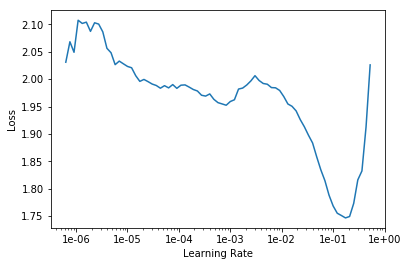

In [40]:
learner.lr_find()
learner.recorder.plot(skip_end=15)

In [49]:
learner.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.006848,0.817504,00:00
1,0.009977,0.831526,00:00
2,0.012189,0.830526,00:00
3,0.010847,0.820539,00:00
4,0.006720,0.822433,00:01


Here is a link to [some benchmarks](https://www.librec.net/release/v1.3/example.html) which shows the best results on this dataset.  The best results acheive a **RMSE** of 0.91 which correspond to **MSE = 0.83**